In [1]:
# Source: https://medium.com/@kirthi.tej92/animations-using-python-a-comprehensive-guide-7d0e075e5c6e
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

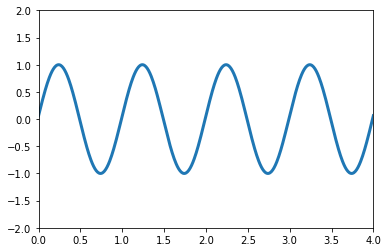

In [11]:
fig = plt.figure()
ax = plt.axes(xlim=(0,4), ylim=(-2,2))
line, = ax.plot([], [], lw=3)

# define functions
def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 500)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# define animation object
anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=10, blit=True)
# initiate writers
FFMpegWriter = animation.writers['ffmpeg']
writer = animation.FFMpegWriter()

#saving animation
anim.save("sinewave.mp4", writer=writer)

In [12]:
!open sinewave.mp4

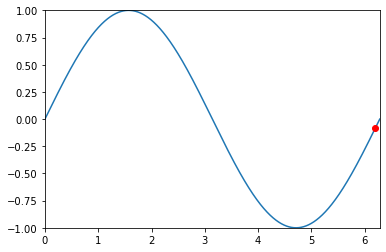

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

TWOPI = 2*np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axis([0,TWOPI,-1,1])

redDot, = plt.plot([0], [np.sin(0)], 'ro')

def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,

# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, frames=np.arange(0.0, TWOPI, 0.1), \
                                      interval=10, blit=True, repeat=True)

myAnimation.save('sine.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [14]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = 'C:\\FFmpeg\\bin\\ffmpeg.exe'
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3


np.random.seed(5)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)


def generateRandomLines(dt, N):
    """
    Create a line using a random walk algorithm.
    """
    
    dX = np.sqrt(dt) * np.random.randn(1, N)
    X = np.cumsum(dX, axis=1)
    
    dY = np.sqrt(dt) * np.random.randn(1, N)
    Y = np.cumsum(dY, axis=1)
    
    dZ = np.sqrt(dt) * np.random.randn(1, N)
    Z = np.cumsum(dZ, axis=1)
    
    lineData = np.vstack((X, Y, Z))
    
    return lineData


def updateLines(num, dataLines, lines, dims):
    for u, v in zip(lines, dataLines):
        if dims == 2:
            u.set_data(v[0:2, :num])
        elif dims == 3:
            u.set_data(v[0:2, :num])
            u.set_3d_properties(v[2, :num])

    return lines

# Simulation properties
dims = 3
N = 501
T = 1.0
dt = T/(N-1)
numPaths = 10

# Create a list of NumPy array sized = numLines x dims x N
data = [generateRandomLines(dt, N) for index in range(numPaths)]

if dims == 2:
    fig, ax = plt.subplots()
    ax = plt.axes(xlim=(-2.0, 2.0), ylim=(-2.0, 2.0))
    ax.set_xlabel('X(t)')
    ax.set_ylabel('Y(t)')
    ax.set_title('2D Discretized Brownian Paths')
    
    # Create a list of line2D objects
    lines = [ax.plot(dat[0, 0:1], dat[1, 0:1])[0] for dat in data]

elif dims == 3:
    fig = plt.figure()
    ax = p3.Axes3D(fig)
    ax.set_xlim3d([-2.0, 2.0])
    ax.set_xlabel('X(t)')

    ax.set_ylim3d([-2.0, 2.0])
    ax.set_ylabel('Y(t)')

    ax.set_zlim3d([-2.0, 2.0])
    ax.set_zlabel('Z(t)')
    
    ax.set_title('3D Discretized Brownian Paths')
    
    # Create a list of line3D objects
    lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]


# Create the animation object
anim = animation.FuncAnimation(fig, updateLines, N+1, fargs=(data, lines, dims),
                                   interval=30, repeat=True, blit=False)


FFMpegWriter = animation.writers['ffmpeg']
writer = animation.FFMpegWriter()

anim.save("Brownianmotion3D.mp4", writer=writer)

RuntimeError: Requested MovieWriter (ffmpeg) not available